In [1]:
import pandas as pd

In [2]:
olive=pd.read_csv(r"C:\Users\100019201\OneDrive\Documentos\2do SEMESTRE\Ciencia de datos\Tarea 1\olive.csv")

In [3]:
# muestra los primeros registros
olive.head()

,Unnamed: 0,Region,Area,palmitic,palmitoleic,stearic,oleic,linoleic,linolenic,arachidic,eicosenoic
0,1,1,North-Apulia,1075,75,226,7823,672,36,60,29
1,2,1,North-Apulia,1088,73,224,7709,781,31,61,29
2,3,1,North-Apulia,911,54,246,8113,549,31,63,29
3,4,1,North-Apulia,966,57,240,7952,619,50,78,35
4,5,1,North-Apulia,1051,67,259,7771,672,50,80,46


In [4]:
# Cantidad de registros

print(olive.shape)

# Nombre de columnas 
print(olive.columns)

(572, 11)
Index(['Unnamed: 0', 'Region', 'Area', 'palmitic', 'palmitoleic', 'stearic',
       'oleic', 'linoleic', 'linolenic', 'arachidic', 'eicosenoic'],
      dtype='object')


In [5]:
# Resumen de variables numericas
olive.describe()

,Unnamed: 0,Region,palmitic,palmitoleic,stearic,oleic,linoleic,linolenic,arachidic,eicosenoic
count,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000
mean,286.500000,1.699301,1231.741259,126.094406,228.865385,7311.748252,980.527972,31.888112,58.097902,16.281469
std,165.266452,0.859968,168.592264,52.494365,36.744935,405.810222,242.799221,12.968697,22.030250,14.083295
min,1.000000,1.000000,610.000000,15.000000,152.000000,6300.000000,448.000000,0.000000,0.000000,1.000000
25%,143.750000,1.000000,1095.000000,87.750000,205.000000,7000.000000,770.750000,26.000000,50.000000,2.000000
50%,286.500000,1.000000,1201.000000,110.000000,223.000000,7302.500000,1030.000000,33.000000,61.000000,17.000000
75%,429.250000,3.000000,1360.000000,169.250000,249.000000,7680.000000,1180.750000,40.250000,70.000000,28.000000
max,572.000000,3.000000,1753.000000,280.000000,375.000000,8410.000000,1470.000000,74.000000,105.000000,58.000000


In [6]:
olive\
    .drop(columns=['Unnamed: 0'])\
    .groupby('Region')\
    .agg('mean')  #<- intenta probar otros estadisticos median, min, max 

,palmitic,palmitoleic,stearic,oleic,linoleic,linolenic,arachidic,eicosenoic
Region,,,,,,,,
1,1332.287926,154.801858,228.773994,7100.009288,1033.498452,38.065015,63.117647,27.321981
2,1111.346939,96.744898,226.183673,7268.020408,1196.530612,27.091837,73.173469,1.938776
3,1094.801325,83.735099,230.801325,7793.052980,727.033113,21.788079,37.576159,1.973510


In [7]:
olive\
    .drop(columns=['Unnamed: 0','Region'])\
    .groupby('Area')\
    .agg('mean')

,palmitic,palmitoleic,stearic,oleic,linoleic,linolenic,arachidic,eicosenoic
Area,,,,,,,,
Calabria,1302.232143,121.357143,262.517857,7307.178571,819.000000,45.571429,63.625000,28.321429
Coast-Sardinia,1138.181818,101.060606,243.818182,7085.787879,1337.272727,23.757576,71.969697,1.878788
East-Liguria,1145.400000,84.200000,241.400000,7746.000000,689.400000,26.400000,63.600000,1.880000
Inland-Sardinia,1097.723077,94.553846,217.230769,7360.538462,1125.076923,28.784615,73.784615,1.969231
North-Apulia,1027.000000,61.600000,234.840000,7820.400000,705.840000,42.560000,71.960000,34.560000
Sicily,1228.361111,104.916667,273.888889,7357.833333,834.722222,42.472222,75.555556,38.444444
South-Apulia,1395.669903,183.922330,210.980583,6911.208738,1166.310680,34.708738,59.733010,24.228155
Umbria,1086.372549,59.882353,194.333333,7955.705882,597.098039,34.117647,42.431373,1.980392
West-Liguria,1052.800000,107.600000,257.400000,7674.200000,897.200000,4.600000,6.600000,2.060000


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
data=olive\
    .drop(columns=['Unnamed: 0','Area'])\
    .groupby(by='Region')\
    .agg('max')\
    .reset_index()
    
data

,Region,palmitic,palmitoleic,stearic,oleic,linoleic,linolenic,arachidic,eicosenoic
0,1,1753,280,375,8113,1462,74,102,58
1,2,1213,135,272,7439,1470,43,105,3
2,3,1400,180,350,8410,1050,70,100,3


In [10]:

tmp=pd.melt(data,id_vars=['Region'], var_name='fatty_acid', value_name='concentration')



tmp


,Region,fatty_acid,concentration
0,1,palmitic,1753
1,2,palmitic,1213
2,3,palmitic,1400
3,1,palmitoleic,280
4,2,palmitoleic,135
5,3,palmitoleic,180
6,1,stearic,375
7,2,stearic,272
8,3,stearic,350
9,1,oleic,8113


<AxesSubplot:xlabel='Region', ylabel='concentration'>

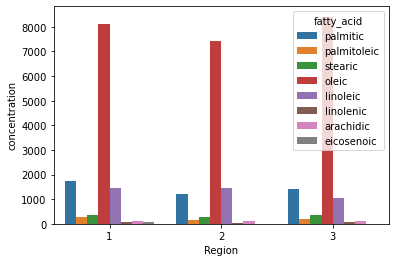

In [11]:
%matplotlib inline

sns.barplot(x="Region", y="concentration", hue="fatty_acid", data=tmp)


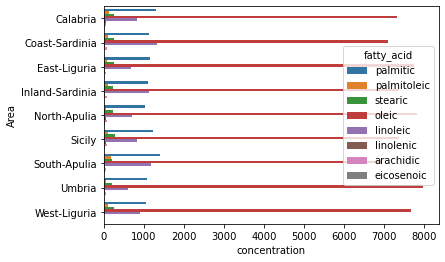

In [12]:
%matplotlib inline

tmp=pd.melt(olive\
    .drop(columns=['Unnamed: 0','Region'])\
    .groupby(by='Area')\
    .agg('mean')\
    .reset_index(),
    id_vars=['Area'], var_name='fatty_acid', value_name='concentration')


sns.barplot(y="Area", x="concentration", hue="fatty_acid", data=tmp)
plt.show()

<AxesSubplot:xlabel='Region', ylabel='palmitic'>

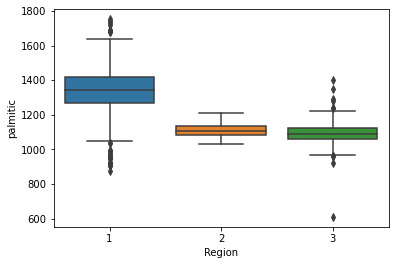

In [13]:
sns.boxplot(x='Region',y='palmitic',data=olive)


<AxesSubplot:xlabel='Region', ylabel='palmitoleic'>

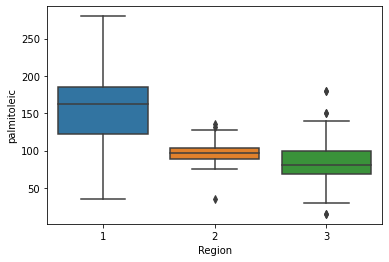

In [14]:
sns.boxplot(x='Region',y='palmitoleic',data=olive)

<AxesSubplot:xlabel='Region', ylabel='stearic'>

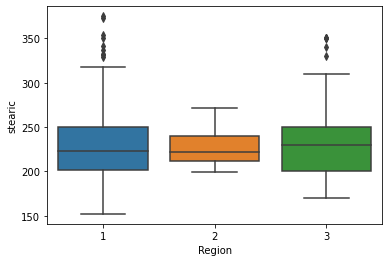

In [15]:
sns.boxplot(x='Region',y='stearic',data=olive)

<AxesSubplot:xlabel='Region', ylabel='oleic'>

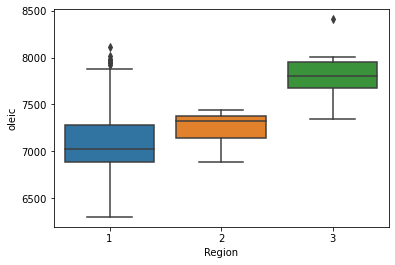

In [16]:
sns.boxplot(x='Region',y='oleic',data=olive)

<AxesSubplot:xlabel='Region', ylabel='linoleic'>

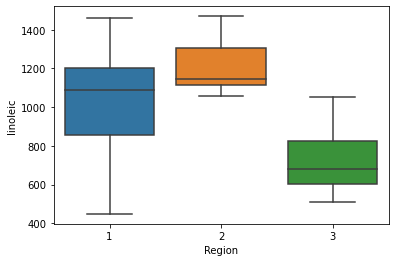

In [17]:
sns.boxplot(x='Region',y='linoleic',data=olive)

<AxesSubplot:xlabel='Region', ylabel='linolenic'>

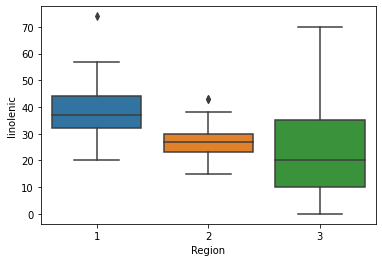

In [18]:
sns.boxplot(x='Region',y='linolenic',data=olive)

<AxesSubplot:xlabel='Region', ylabel='arachidic'>

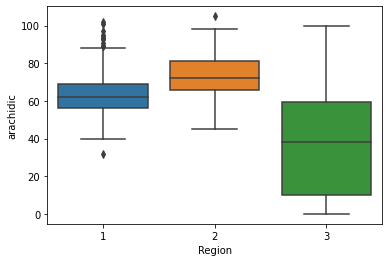

In [19]:
sns.boxplot(x='Region',y='arachidic',data=olive)

<AxesSubplot:xlabel='Region', ylabel='eicosenoic'>

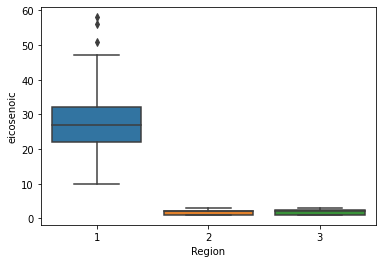

In [20]:
sns.boxplot(x='Region',y='eicosenoic',data=olive)

<AxesSubplot:xlabel='arachidic', ylabel='Density'>

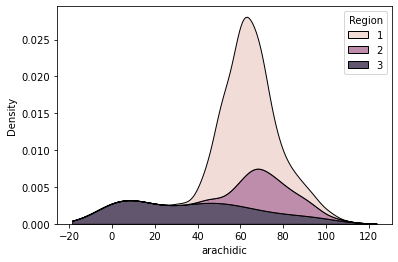

In [21]:
sns.kdeplot(data=olive,x="arachidic",hue="Region",multiple="stack")

<AxesSubplot:xlabel='eicosenoic', ylabel='Density'>

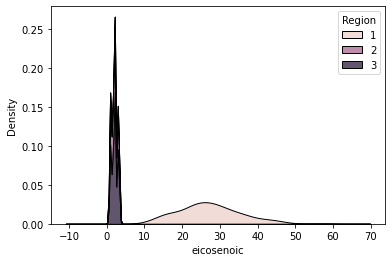

In [22]:
sns.kdeplot(data=olive,x="eicosenoic",hue="Region",multiple="stack")

<AxesSubplot:xlabel='oleic', ylabel='Density'>

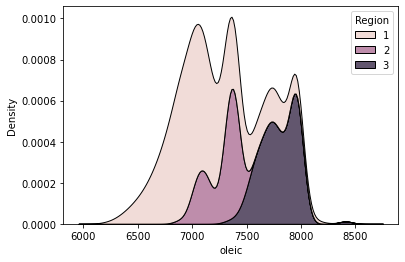

In [23]:
sns.kdeplot(data=olive,x="oleic",hue="Region",multiple="stack")

In [24]:
region1_df = olive[olive['Region'] == 1]

region2_df = olive[olive['Region'] == 2]

region3_df = olive[olive['Region'] == 3]


<AxesSubplot:xlabel='oleic', ylabel='Density'>

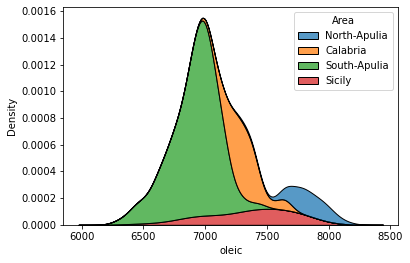

In [25]:
sns.kdeplot(data=region1_df,x="oleic",hue="Area",multiple="stack")

<AxesSubplot:xlabel='palmitic', ylabel='Density'>

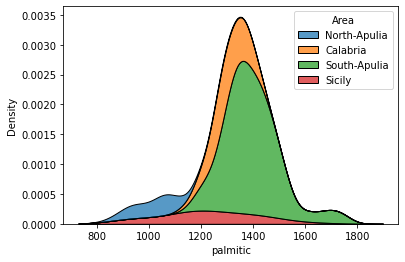

In [26]:
sns.kdeplot(data=region1_df,x="palmitic",hue="Area",multiple="stack")

<AxesSubplot:xlabel='palmitoleic', ylabel='Density'>

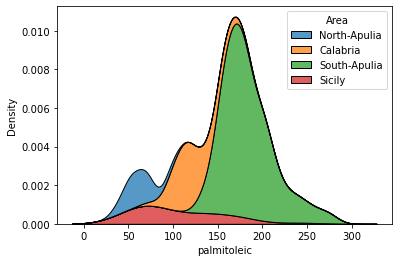

In [27]:
sns.kdeplot(data=region1_df,x="palmitoleic",hue="Area",multiple="stack")

<AxesSubplot:xlabel='stearic', ylabel='Density'>

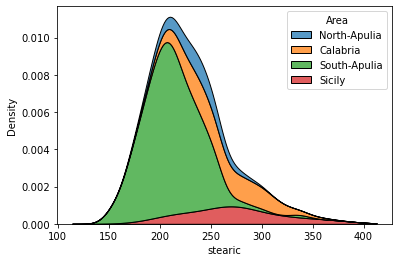

In [28]:
sns.kdeplot(data=region1_df,x="stearic",hue="Area",multiple="stack")

<AxesSubplot:xlabel='linoleic', ylabel='Density'>

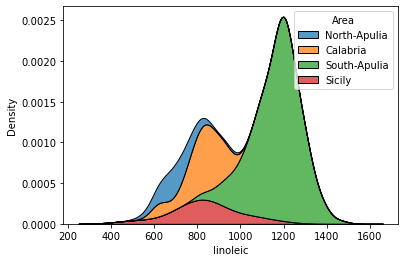

In [29]:
sns.kdeplot(data=region1_df,x="linoleic",hue="Area",multiple="stack")

<AxesSubplot:xlabel='linolenic', ylabel='Density'>

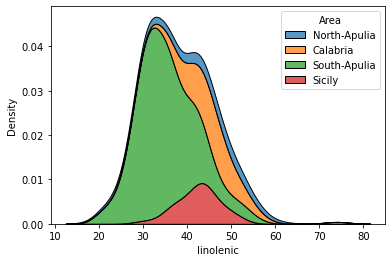

In [30]:
sns.kdeplot(data=region1_df,x="linolenic",hue="Area",multiple="stack")

<AxesSubplot:xlabel='arachidic', ylabel='Density'>

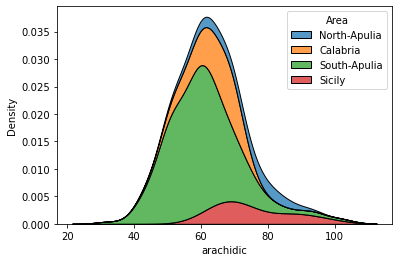

In [31]:
sns.kdeplot(data=region1_df,x="arachidic",hue="Area",multiple="stack")

<AxesSubplot:xlabel='eicosenoic', ylabel='Density'>

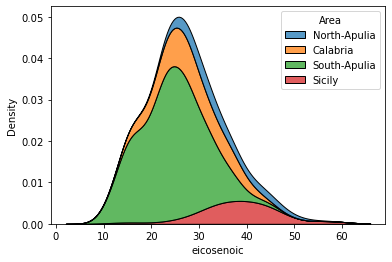

In [32]:
sns.kdeplot(data=region1_df,x="eicosenoic",hue="Area",multiple="stack")

<AxesSubplot:xlabel='oleic', ylabel='Density'>

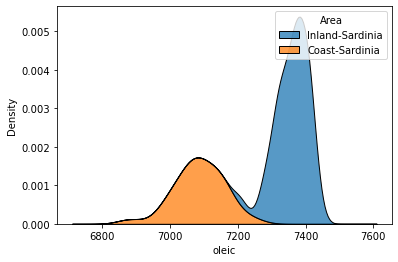

In [33]:
sns.kdeplot(data=region2_df,x="oleic",hue="Area",multiple="stack")

<AxesSubplot:xlabel='palmitic', ylabel='Density'>

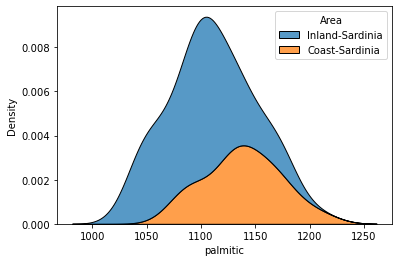

In [34]:
sns.kdeplot(data=region2_df,x="palmitic",hue="Area",multiple="stack")

<AxesSubplot:xlabel='palmitoleic', ylabel='Density'>

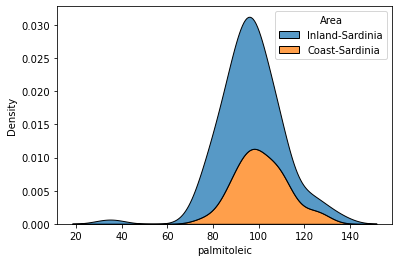

In [35]:
sns.kdeplot(data=region2_df,x="palmitoleic",hue="Area",multiple="stack")

<AxesSubplot:xlabel='stearic', ylabel='Density'>

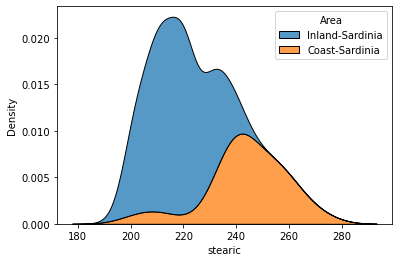

In [36]:
sns.kdeplot(data=region2_df,x="stearic",hue="Area",multiple="stack")

<AxesSubplot:xlabel='linoleic', ylabel='Density'>

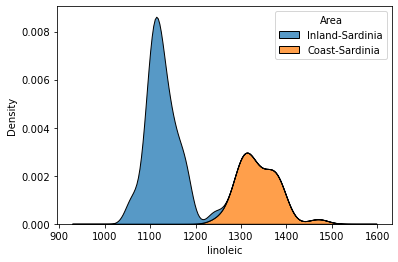

In [37]:
sns.kdeplot(data=region2_df,x="linoleic",hue="Area",multiple="stack")

<AxesSubplot:xlabel='linolenic', ylabel='Density'>

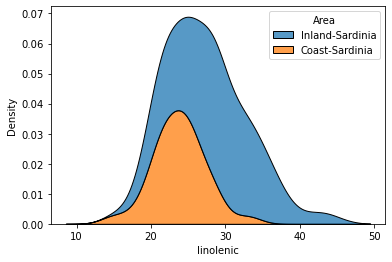

In [38]:
sns.kdeplot(data=region2_df,x="linolenic",hue="Area",multiple="stack")

<AxesSubplot:xlabel='arachidic', ylabel='Density'>

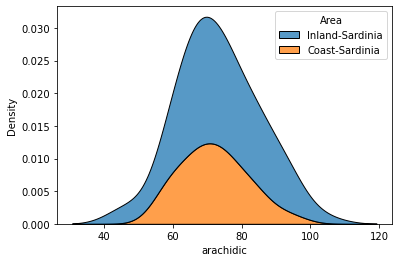

In [39]:
sns.kdeplot(data=region2_df,x="arachidic",hue="Area",multiple="stack")

<AxesSubplot:xlabel='eicosenoic', ylabel='Density'>

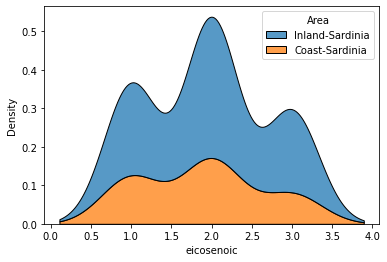

In [40]:
sns.kdeplot(data=region2_df,x="eicosenoic",hue="Area",multiple="stack")

<AxesSubplot:xlabel='oleic', ylabel='Density'>

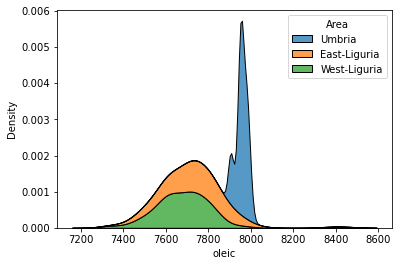

In [41]:
sns.kdeplot(data=region3_df,x="oleic",hue="Area",multiple="stack")

<AxesSubplot:xlabel='palmitic', ylabel='Density'>

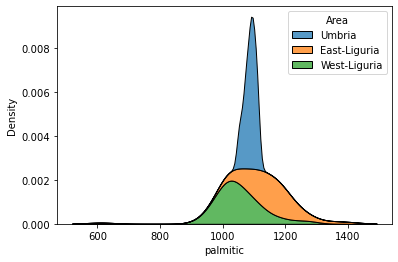

In [42]:
sns.kdeplot(data=region3_df,x="palmitic",hue="Area",multiple="stack")

<AxesSubplot:xlabel='palmitoleic', ylabel='Density'>

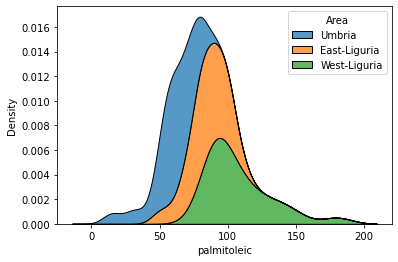

In [43]:
sns.kdeplot(data=region3_df,x="palmitoleic",hue="Area",multiple="stack")

<AxesSubplot:xlabel='stearic', ylabel='Density'>

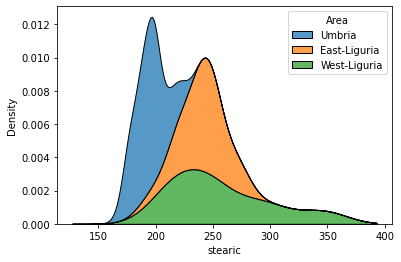

In [44]:
sns.kdeplot(data=region3_df,x="stearic",hue="Area",multiple="stack")

<AxesSubplot:xlabel='linoleic', ylabel='Density'>

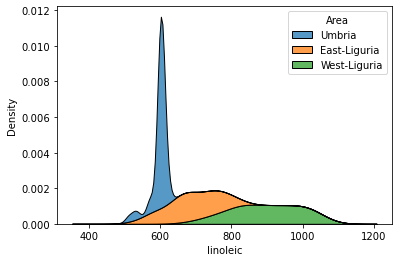

In [45]:
sns.kdeplot(data=region3_df,x="linoleic",hue="Area",multiple="stack")

<AxesSubplot:xlabel='linolenic', ylabel='Density'>

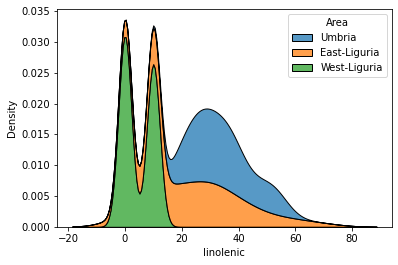

In [46]:
sns.kdeplot(data=region3_df,x="linolenic",hue="Area",multiple="stack")

<AxesSubplot:xlabel='arachidic', ylabel='Density'>

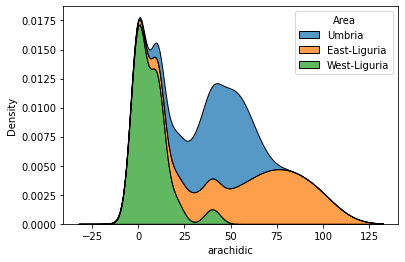

In [47]:
sns.kdeplot(data=region3_df,x="arachidic",hue="Area",multiple="stack")

<AxesSubplot:xlabel='eicosenoic', ylabel='Density'>

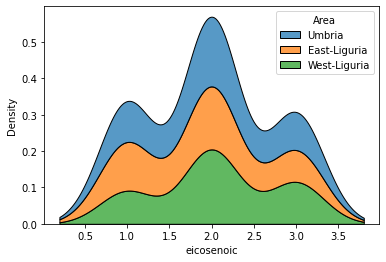

In [48]:
sns.kdeplot(data=region3_df,x="eicosenoic",hue="Area",multiple="stack")

<AxesSubplot:xlabel='palmitoleic'>

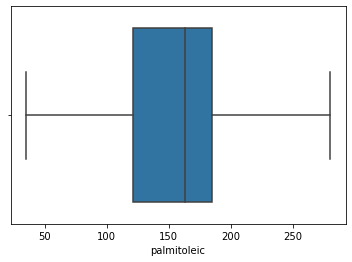

In [49]:
sns.boxplot(data=region1_df,x="palmitoleic",hue="Area")